In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [4]:
df = pd.read_csv("../data/runtime/query-runtime-all.csv")

# Display basic information about the DataFrame
print("Shape of the DataFrame:", df.shape)
print("\nColumns in the DataFrame:", df.columns)
print("\nData types of columns:")
print(df.dtypes)

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())


Shape of the DataFrame: (1803, 4)

Columns in the DataFrame: Index(['query', 'runtime (ms)', 'db', 'engine'], dtype='object')

Data types of columns:
query            object
runtime (ms)    float64
db               object
engine           object
dtype: object

Summary statistics:
       runtime (ms)
count   1803.000000
mean     448.000642
std     3447.939121
min        0.166178
25%        0.627637
50%        1.147270
75%        2.873540
max    59536.843061

First few rows of the DataFrame:
                                               query  runtime (ms)        db  \
0  SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...      8.092165  advising   
1  SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...      0.772238  advising   
2  SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...      0.530958  advising   
3  SELECT COUNT( * ) > 0 FROM COURSE AS COURSEali...     92.988014  advising   
4  SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...      1.093864  advising   

  engine  
0  mysql  
1 

In [5]:
df.head()

,query,runtime (ms),db,engine
0,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...,8.092165,advising,mysql
1,"SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...",0.772238,advising,mysql
2,"SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...",0.530958,advising,mysql
3,SELECT COUNT( * ) > 0 FROM COURSE AS COURSEali...,92.988014,advising,mysql
4,"SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...",1.093864,advising,mysql


In [6]:
df.shape

(1803, 4)

In [7]:
df.db.unique()

array(['advising', 'atis', 'geography', 'restaurants', 'imdb', 'car_1',
       'student_1', 'inn_1', 'formula_1'], dtype=object)

### Clustering the data using K means clustering

/Users/shreyanshjoshi/anaconda3/envs/sj_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


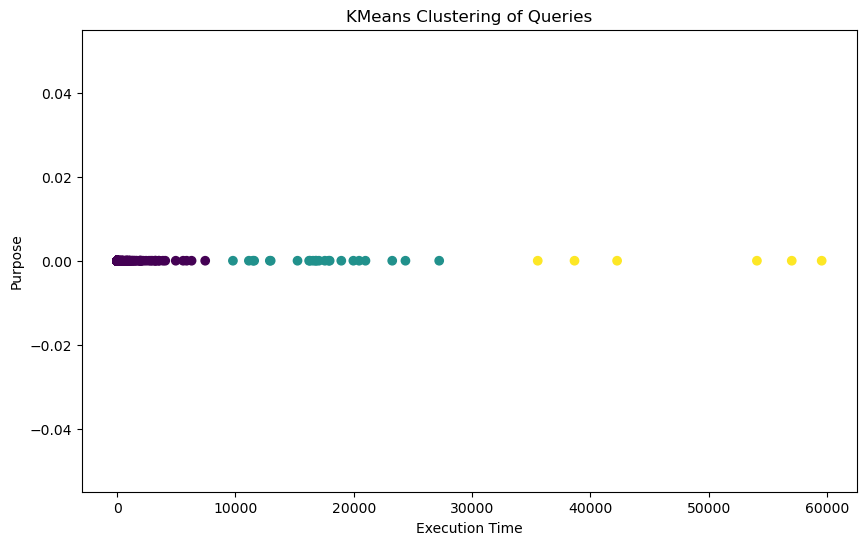

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your DataFrame containing the data
X = df['runtime (ms)'].values.reshape(-1,1)

# Perform KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans_3.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime (ms)'], [0] * len(df), c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Queries')
plt.xlabel('Execution Time')
plt.ylabel('Purpose')
plt.show()

/Users/shreyanshjoshi/anaconda3/envs/sj_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


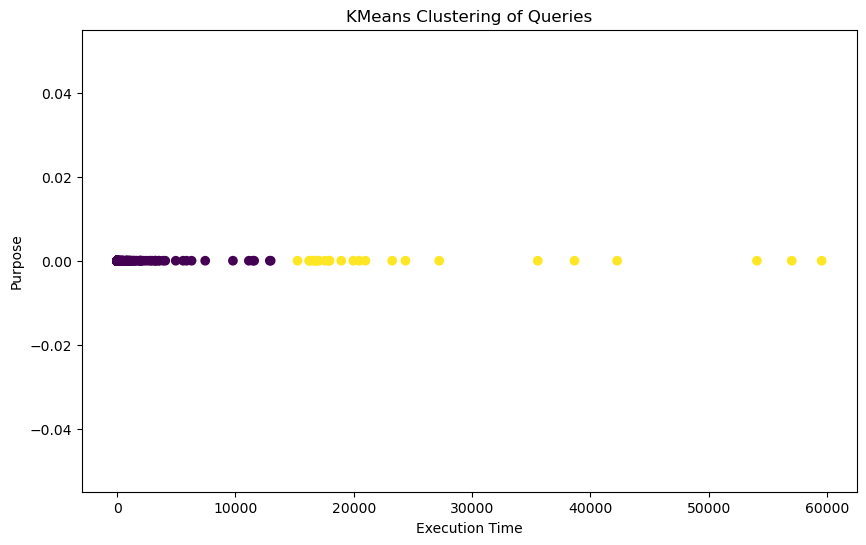

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your DataFrame containing the data
X = df['runtime (ms)'].values.reshape(-1,1)

# Perform KMeans clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
ex = kmeans_2.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime (ms)'], [0] * len(df), c=ex, cmap='viridis')
plt.title('KMeans Clustering of Queries')
plt.xlabel('Execution Time')
plt.ylabel('Purpose')
plt.show()

In [10]:
df['cluster'].value_counts()

cluster
0    1774
1      23
2       6
Name: count, dtype: int64

### Clustering using different k values

In [11]:
# Assume df is your DataFrame containing the data
X = df[df['cluster']==0]['runtime (ms)'].values.reshape(-1,1)
df_0 = df[df['cluster']==0]

clusters = [5,10,15,20]

for c in clusters:
    # Perform KMeans clustering with 3 clusters
    kmeans_3 = KMeans(n_clusters=c, random_state=42)
    df_0['cluster_0'] = kmeans_3.fit_predict(X)
    print(f"{c}\n")
    print(df_0['cluster_0'].value_counts())

/Users/shreyanshjoshi/anaconda3/envs/sj_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/1565510406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['cluster_0'] = kmeans_3.fit_predict(X)
/Users/shreyanshjoshi/anaconda3/envs/sj_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_inp

5

cluster_0
0    1710
4      35
2      14
3      10
1       5
Name: count, dtype: int64
10

cluster_0
0    1696
5      24
3      22
1       9
8       8
6       6
4       4
9       3
2       1
7       1
Name: count, dtype: int64


/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/1565510406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['cluster_0'] = kmeans_3.fit_predict(X)
/Users/shreyanshjoshi/anaconda3/envs/sj_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/1565510406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

15

cluster_0
0     1695
12      14
6       13
10      12
4       10
2        8
9        6
3        4
11       3
7        2
14       2
1        2
8        1
5        1
13       1
Name: count, dtype: int64
20

cluster_0
0     1673
17      23
14      13
7       11
2        8
15       8
4        7
19       6
8        4
11       4
16       3
6        3
1        2
13       2
9        2
10       1
5        1
12       1
18       1
3        1
Name: count, dtype: int64


/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/1565510406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['cluster_0'] = kmeans_3.fit_predict(X)


### Plotting a histogram of the data

/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/260305265.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['runtime (us)'] = filtered_df['runtime (ms)'] * 1000


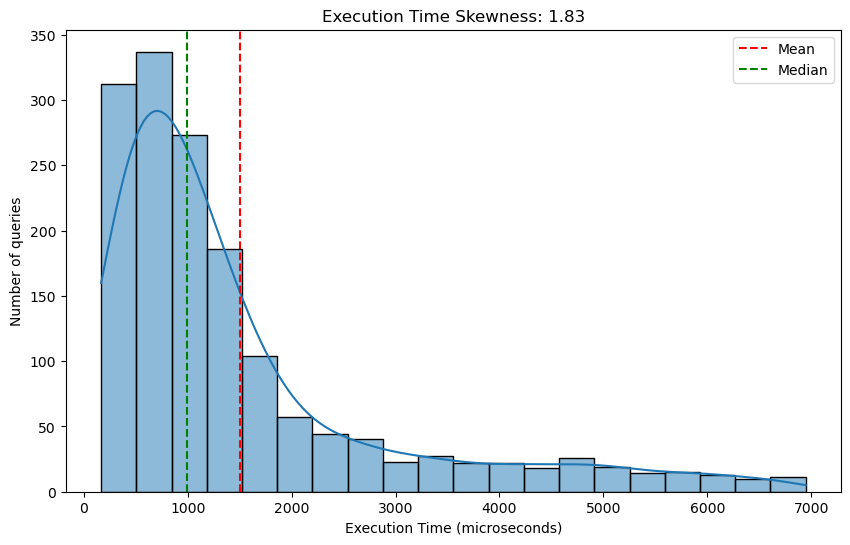

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

filtered_df = df[df['runtime (ms)'] <= 7]

# Convert milliseconds to microseconds
filtered_df['runtime (us)'] = filtered_df['runtime (ms)'] * 1000

# Calculate skewness
execution_time_skewness = skew(filtered_df['runtime (us)'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['runtime (us)'], bins=20, kde=True)
plt.axvline(filtered_df['runtime (us)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(filtered_df['runtime (us)'].median(), color='green', linestyle='--', label='Median')
plt.title(f'Execution Time Skewness: {execution_time_skewness:.2f}')
plt.xlabel('Execution Time (microseconds)')
plt.ylabel('Number of queries')
plt.legend()
plt.show()

### Adding a Complex column
In order to account for complex operations like `JOIN`, `ORDER BY` and other agggregation functions, we add a separate feature column called **complex**.

In [13]:
new_col = []
complex_keywords = ["JOIN", "DISTINCT", "GROUP BY", "COUNT", "ORDER BY"]
for i, row in filtered_df.iterrows():
    contains_complex_predicate = any(word in row["query"] for word in complex_keywords)
    new_col.append(contains_complex_predicate)

filtered_df['complex'] = new_col
pd.set_option('display.max_colwidth', None)
# df.sort_values(by='runtime (ms)').head(50)[['query', 'complex']]

/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/4064521729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['complex'] = new_col


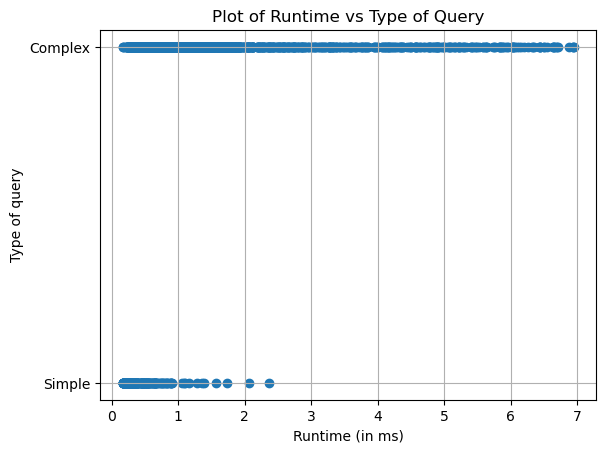

In [14]:
plt.scatter(filtered_df['runtime (ms)'], filtered_df['complex'], marker='o')

# Adding labels and title
plt.xlabel('Runtime (in ms)')
plt.ylabel('Type of query')
plt.title('Plot of Runtime vs Type of Query')
plt.yticks([0, 1], ["Simple", "Complex"])
plt.savefig('scatter.svg', format='svg')
plt.grid(True)

# Displaying the plot
plt.show()

### Box plot of data according to complexity

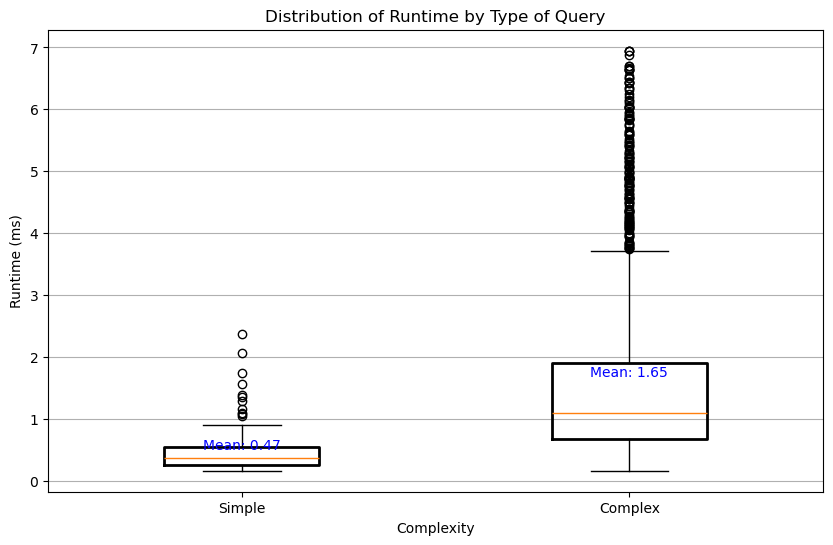

Mean runtime for Simple queries: 0.47 ms
Mean runtime for Complex queries: 1.65 ms
Median runtime for Simple queries: 0.37 ms
Median runtime for Complex queries: 1.09 ms


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate the data based on the 'complex' column
complex_true = filtered_df[filtered_df['complex'] == True]['runtime (ms)']
complex_false = filtered_df[filtered_df['complex'] == False]['runtime (ms)']

# Calculate the mean values for both groups
mean_complex_true = complex_true.mean()
mean_complex_false = complex_false.mean()

median_complex_true = complex_true.median()
median_complex_false = complex_false.median()

# Create boxplots for both groups
plt.figure(figsize=(10, 6))
boxprops = dict(linewidth=2)  # Set box properties
plt.boxplot([complex_false, complex_true], labels=['Simple', 'Complex'], boxprops=boxprops, widths=0.4)

# Set labels and title
plt.xlabel('Complexity')
plt.ylabel('Runtime (ms)')
plt.title('Distribution of Runtime by Type of Query')
plt.grid(axis='y')

# Display mean values on the plot
plt.text(1, mean_complex_false, f'Mean: {mean_complex_false:.2f}', horizontalalignment='center', verticalalignment='bottom', color='blue')
plt.text(2, mean_complex_true, f'Mean: {mean_complex_true:.2f}', horizontalalignment='center', verticalalignment='bottom', color='blue')

# Save and show the plot
plt.savefig('boxplot.svg', format='svg')
plt.show()

print(f"Mean runtime for Simple queries: {mean_complex_false:.2f} ms")
print(f"Mean runtime for Complex queries: {mean_complex_true:.2f} ms")

print(f"Median runtime for Simple queries: {median_complex_false:.2f} ms")
print(f"Median runtime for Complex queries: {median_complex_true:.2f} ms")


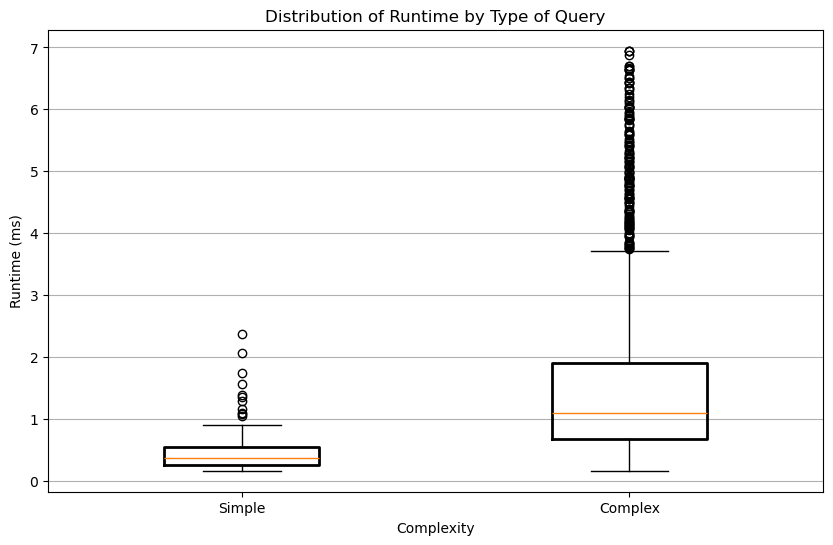

In [15]:
# Separate the data based on the 'complex' column
complex_true = filtered_df[filtered_df['complex'] == True]['runtime (ms)']
complex_false = filtered_df[filtered_df['complex'] == False]['runtime (ms)']

# Create boxplots for both groups
plt.figure(figsize=(10, 6))
boxprops = dict(linewidth=2)  # Set box properties
plt.boxplot([complex_false, complex_true], labels=['Simple', 'Complex'], boxprops=boxprops, widths=0.4)

# Set labels and title
plt.xlabel('Complexity')
plt.ylabel('Runtime (ms)')
plt.title('Distribution of Runtime by Type of Query')
plt.grid(axis='y')

# Save and show the plot
plt.savefig('boxplot.svg', format='svg')
plt.show()

## Plotting runtime, complexity and table size

In [16]:
# converting all queries to lowercase

filtered_df['query'] = filtered_df['query'].str.lower()

/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/3165215916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['query'] = filtered_df['query'].str.lower()


In [17]:
with open("../data/table_sizes.json", 'r') as json_file:
    table_names = json.load(json_file)

print("Loaded dictionary:", table_names)

Loaded dictionary: {'advising': {'area': 76, 'comment_instructor': 0, 'course': 11453, 'course_offering': 151754, 'course_prerequisite': 43, 'course_tags_count': 0, 'gsi': 0, 'instructor': 9443, 'offering_instructor': 159612, 'program': 1, 'program_course': 39, 'program_requirement': 4, 'semester': 74, 'student': 11, 'student_record': 86}, 'atis': {'aircraft': 43, 'airline': 46, 'airport': 52, 'airport_service': 64, 'city': 46, 'class_of_service': 19, 'code_description': 7, 'compartment_class': 6, 'date_day': 2557, 'days': 233, 'dual_carrier': 23, 'equipment_sequence': 952, 'fare': 16252, 'fare_basis': 60, 'flight': 23457, 'flight_fare': 67230, 'flight_leg': 37021, 'flight_stop': 13564, 'food_service': 374, 'ground_service': 168, 'month': 12, 'restriction': 14, 'state': 26, 'time_interval': 13, 'time_zone': 4}, 'geography': {'border_info': 218, 'city': 386, 'highlow': 51, 'lake': 32, 'mountain': 50, 'river': 149, 'state': 51}, 'restaurants': {'geographic': 167, 'location': 9539, 'resta

In [18]:
def compute_table_size(row, table_names):
    query = row['query']
    db = row['db']
    words = query.split()
    count = 0
    for word in words:
        if word in table_names[db]:
            count += table_names[db][word]
    return count

filtered_df['table_size'] = filtered_df.apply(lambda row: compute_table_size(row, table_names), axis=1)

/var/folders/6g/64y0g_wn5r30qxnzvhgww7q00000gn/T/ipykernel_41107/3095435313.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['table_size'] = filtered_df.apply(lambda row: compute_table_size(row, table_names), axis=1)


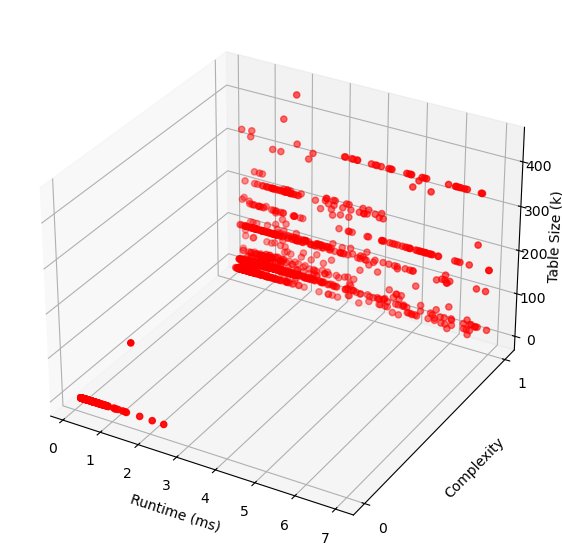

In [19]:
x = filtered_df['runtime (ms)']
y = filtered_df['complex']
z = filtered_df['table_size'] / 1000

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(x, y, z, c='r', marker='o')

# Set labels
ax.set_xlabel('Runtime (ms)')
ax.set_ylabel('Complexity')
ax.set_zlabel('Table Size (k)', labelpad=-5)
ax.tick_params(axis="z", pad=-1)

ax.set_yticks([0, 1])

# Show plot
plt.show()

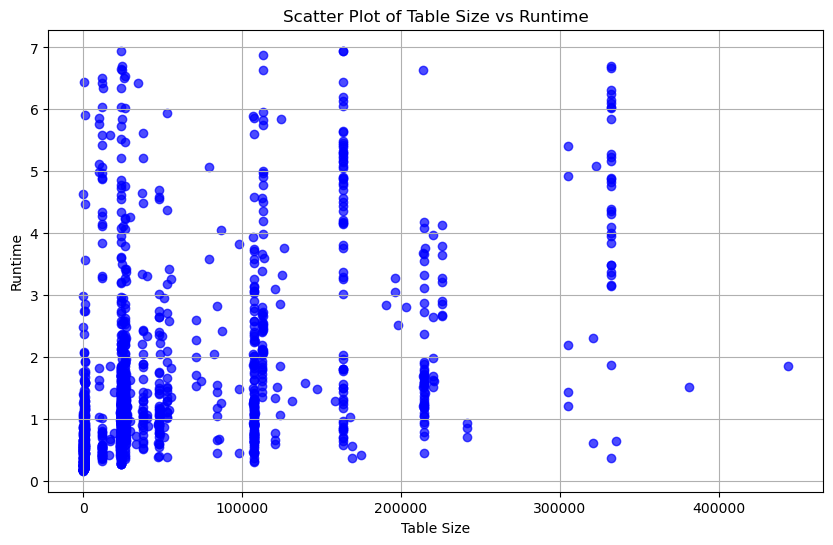

In [20]:
# Create a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['table_size'], filtered_df['runtime (ms)'], color='blue', alpha=0.7)

# Adding title and labels
plt.title('Scatter Plot of Table Size vs Runtime')
plt.xlabel('Table Size')
plt.ylabel('Runtime')

# Show the plot
plt.grid(True)
plt.show()